<a href="https://colab.research.google.com/github/SivaSrinivasanS/tansam/blob/main/Leaf_Disease_Classification%20-%20copy%20from%20colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Deep learning Classification Problem:

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 9

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import files

# Upload the RAR archive file
uploaded_rar_file = files.upload()


Saving dlmodel.rar to dlmodel.rar


In [ ]:
!cp '/content/drive/My Drive/Deeplearning/model' '/content/'


cp: cannot stat '/content/drive/My Drive/Deeplearning/model': No such file or directory


In [ ]:
!pip install unrar


In [ ]:
import os
import shutil
from unrar import rarfile

# Define the path for the target folder
target_folder = '/content/deeplearning_model'

# Extract the contents of the uploaded RAR archive
rar_filename = 'dlmodel.rar'
with rarfile.RarFile(rar_filename, 'r') as rf:
    rf.extractall(target_folder)

# Verify the extracted files
extracted_files = os.listdir(target_folder)
print("Extracted files:", extracted_files)


LookupError: ignored

In [ ]:
#sib
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/Deeplearning/model",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)


NotFoundError: ignored

In [ ]:
class_names = dataset.class_names
class_names

NameError: ignored

In [ ]:
#fff si tas

plt.figure(figsize = (10,10))
for img_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3, 4, i + 1)
        plt.imshow(img_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
plt.show()


NameError: ignored

<Figure size 1000x1000 with 0 Axes>

In [ ]:
def get_partitions(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_value = 10000):
    ds_size = len(dataset)

    if shuffle:
        ds = ds.shuffle(shuffle_value, seed = 12)

    train_size = int(ds_size * train_split)
    val_size = int(ds_size * val_split)

    train_ds = dataset.take(train_size)
    val_ds = dataset.skip(train_size).take(val_size)
    test_ds = dataset.skip(train_size + val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_partitions(dataset)

In [ ]:
print(len(train_ds), len(val_ds), len(test_ds))


54 6 8


In [ ]:
batch_size = tf.data.AUTOTUNE

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(batch_size)
val_ds = val_ds.cache().shuffle(1000).prefetch(batch_size)
test_ds = test_ds.cache().shuffle(1000).prefetch(batch_size)

In [ ]:
#Pre processing for model:
resizing_and_rescaling = models.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = models.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

In [ ]:
#Kai
cnn_model = models.Sequential([
    resizing_and_rescaling,
    data_augmentation,
    layers.Conv2D(30, kernel_size = (3,3), activation = "relu", input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(50, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(50, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(50, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(50, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    layers.Dense(32, activation = "relu"),
    layers.Dense(n_classes, "softmax")
])

In [ ]:
cnn_model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ["accuracy"]
)

In [ ]:
history = cnn_model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/9
54/54 [==============================] - 123s 2s/step - loss: 0.5132 - accuracy: 0.8021 - val_loss: 0.4575 - val_accuracy: 0.8281
Epoch 2/9
54/54 [==============================] - 120s 2s/step - loss: 0.3342 - accuracy: 0.8675 - val_loss: 0.3575 - val_accuracy: 0.8750
Epoch 3/9
54/54 [==============================] - 120s 2s/step - loss: 0.2612 - accuracy: 0.9034 - val_loss: 0.3697 - val_accuracy: 0.8646
Epoch 4/9
54/54 [==============================] - 121s 2s/step - loss: 0.2066 - accuracy: 0.9225 - val_loss: 0.2784 - val_accuracy: 0.8854
Epoch 5/9
54/54 [==============================] - 119s 2s/step - loss: 0.1763 - accuracy: 0.9323 - val_loss: 0.2491 - val_accuracy: 0.9271
Epoch 6/9
54/54 [==============================] - 124s 2s/step - loss: 0.1842 - accuracy: 0.9306 - val_loss: 0.1916 - val_accuracy: 0.9115
Epoch 7/9
54/54 [==============================] - 119s 2s/step - loss: 0.1589 - accuracy: 0.9456 - val_loss: 0.2250 - val_accuracy: 0.9010
Epoch 8/9
54/54 [===

In [ ]:
scores = cnn_model.evaluate(test_ds)

8/8 [==============================] - 5s 444ms/step - loss: 0.1587 - accuracy: 0.9526


In [ ]:
scores

[0.15866898000240326, 0.9525862336158752]

In [ ]:
cnn_model.build()

In [ ]:
cnn_model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x0000027619C7E2E0>>

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 9, 'steps': 54}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

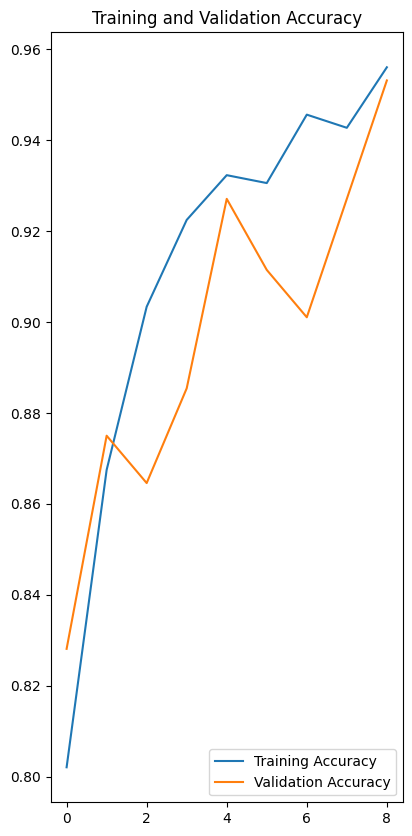

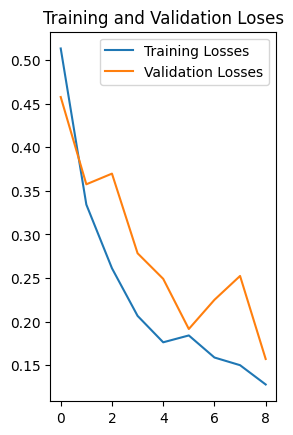

In [ ]:
#Training and Validation stuffs
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.figure(figsize = (10,10))

plt.subplot(1, 2, 1)
plt.plot(range(9), acc, label = ("Training Accuracy"))
plt.plot(range(9), val_acc, label = ("Validation Accuracy"))
plt.legend(loc = "lower right")
plt.title("Training and Validation Accuracy")
plt.show()

plt.subplot(1, 2, 2)
plt.plot(range(9), loss, label = ("Training Losses"))
plt.plot(range(9), val_loss, label = ("Validation Losses"))
plt.legend(loc = "upper right")
plt.title("Training and Validation Loses")
plt.show()


In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predicted = model.predict(img_array)
    predicted_class = class_names[np.argmax(predicted[0])]

    confidence = round( 100 * (np.max(predicted[0])) ,2)

    return predicted_class, confidence

1/1 [==============================] - 0s 38ms/step


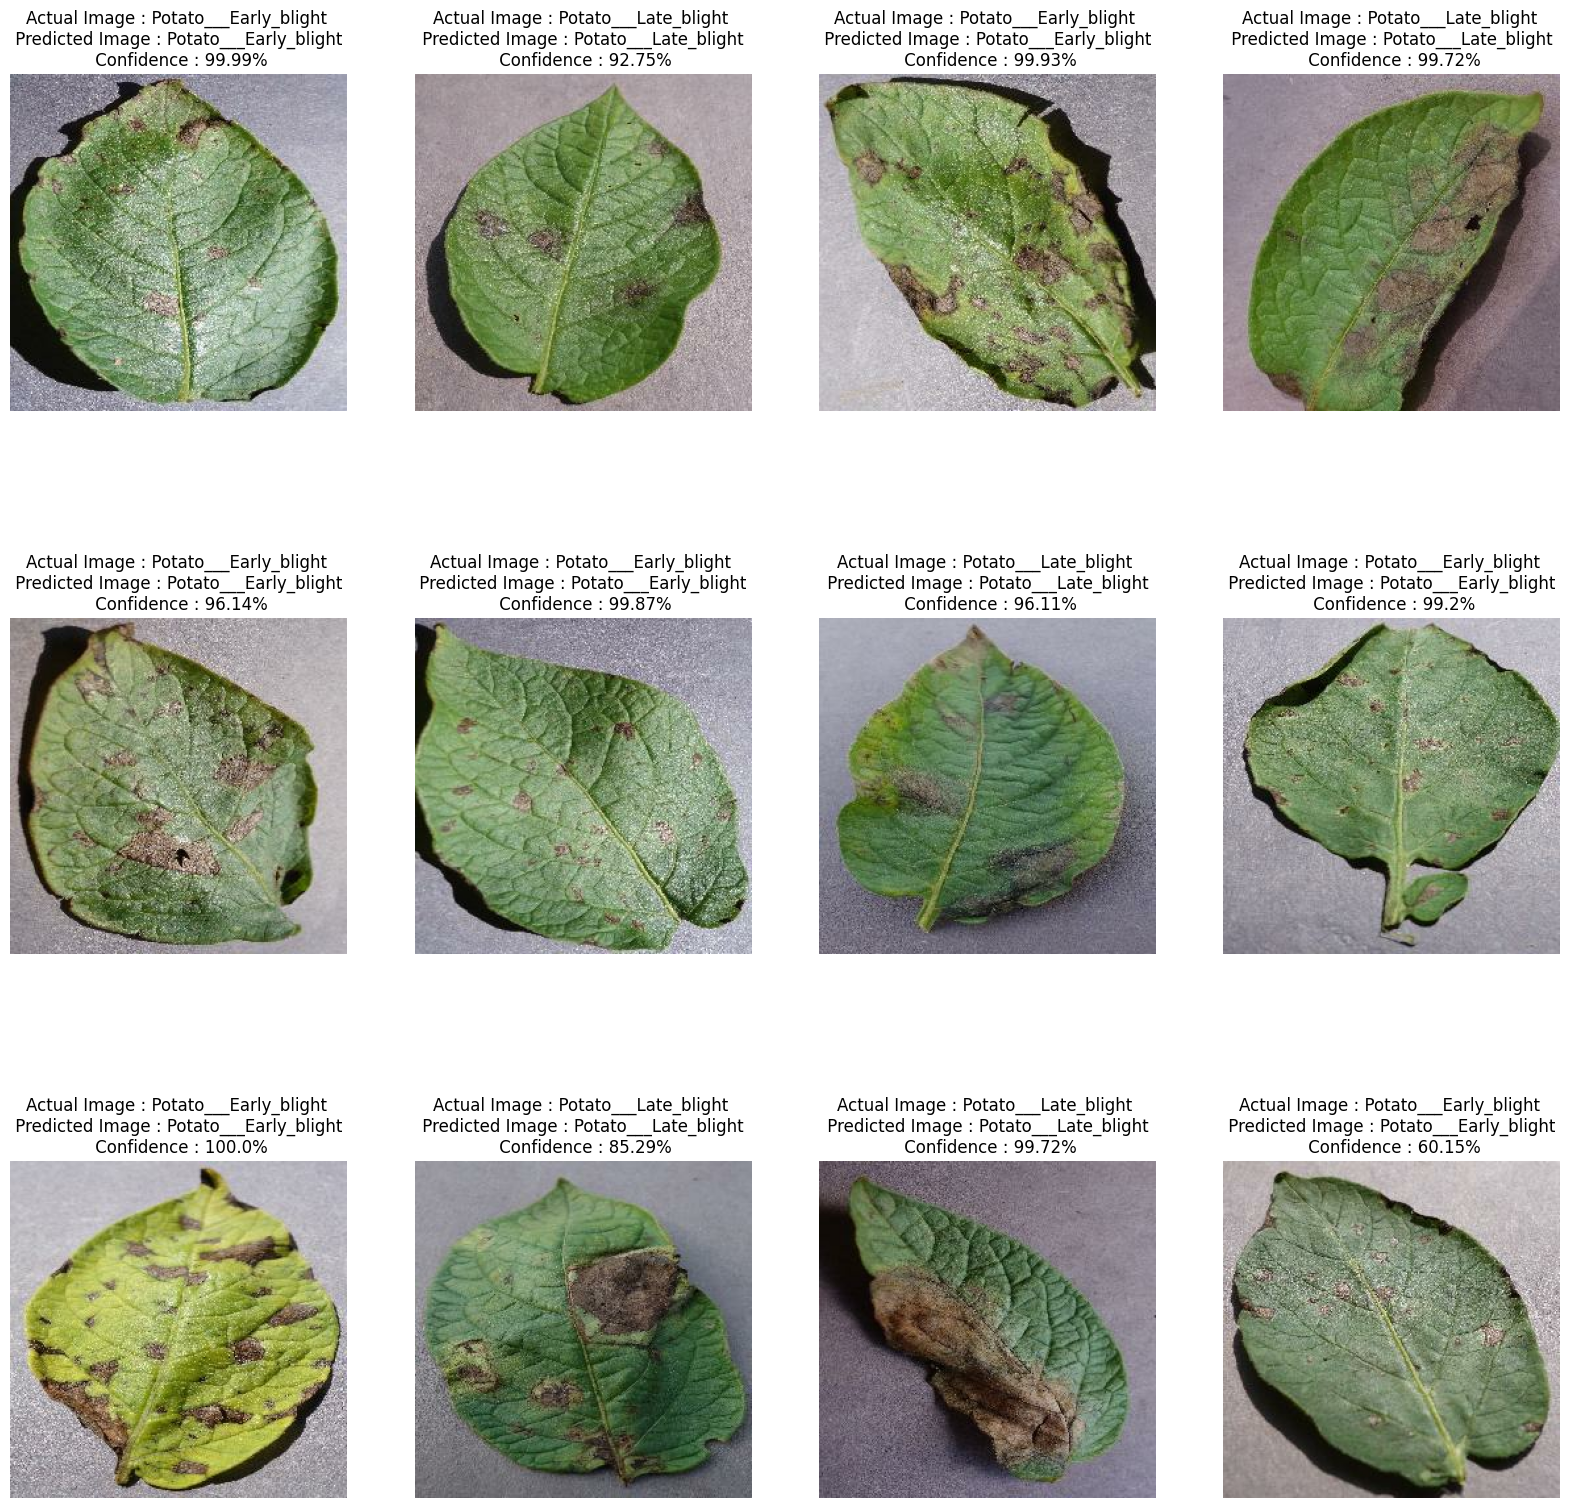

In [ ]:
plt.figure(figsize = (20,20))
for images, labels in test_ds.take(1):
    for i in range(12):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(cnn_model, images[i])
        actual_class = class_names[labels[i]]
        plt.axis("off")
        plt.title(f"Actual Image : {actual_class} \n Predicted Image : {predicted_class} \n Confidence : {confidence}%")

plt.show()

In [ ]:
model_version = 1
cnn_model.save(f"/DLModel/{model_version}")

INFO:tensorflow:Assets written to: /DLModel/1\assets


INFO:tensorflow:Assets written to: /DLModel/1\assets


In [ ]:
import os
model_version = max([int(i) for i in os.listdir("/DLModel") + [0]]) + 1
model_version
cnn_model.save(f"/DLModel/{model_version}")

INFO:tensorflow:Assets written to: /DLModel/2\assets


INFO:tensorflow:Assets written to: /DLModel/2\assets
